<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 模型化

## 模型(model)
在不同變數之間，存在數學(或機率)關係的某種**規格規範(specification)**

# 機器學習的定義
自資料學習而得的模型，故被稱為**預測模型化(predictive modeling)**或 **資料探勘(data mining)**。 
  
機器學習的種類：
* 監督式模型(supervised)：資料已標示正確答案
* 無監督式模型(unsupervised)：資料未標示正確答案
* 半監督式模型(semi-supervised)：只有部分資料標示正確答案
* 線上模型(online)：需針對新資料持續進行調整
* 強化模型(reinforcement)：在進行一系列預測後得到一個**訊號**說明他做得多好




## 過度套入 (overfitting)
製作出來的模型隊訓練資料而言非常完美，但面對任何新資料的表現卻十分遜色

## 套入不足 (underfitting)
此種模型即是面對訓練用資料表現也鋪怎麼樣

### 圖 11-1 過度套入與套入不足
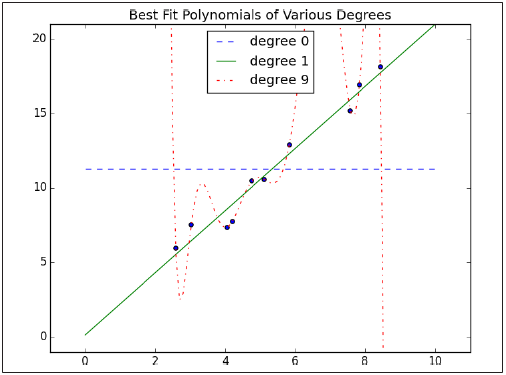

In [4]:
import random
from typing import TypeVar,List,Tuple
X=TypeVar('X') #以通用型別來代表資料點

def split_data(data:List[X],prob:float) ->Tuple[List[X],List[X]]:
  """把資料依照[prob,1-prob]的比率進行切割"""
  data = data[:]        #複製一份資料
  random.shuffle(data)      #因shuffle會打亂資料
  cut = int(len(data)*prob)   #用prob算出切分點
  return data[:cut],data[cut:]  #用打亂過的資料進行切分

In [5]:
data = [n for n in range(1000)]
train,test = split_data(data,0.75)

#比例應該是正確的
assert len(train) == 750
assert len(test) == 250

#原資料應該還是保存得很好
assert sorted(train+test) == data

In [9]:
Y = TypeVar('Y') #以通用型別來表示輸出變數

def train_test_split(xs:List[X],ys:List[Y],test_pct:float)->Tuple[List[X],List[X],List[Y],List[Y]]:

  #生成索引並進行切分
  idxs = [i for i in range(len(xs))]
  train_idxs,test_idxs = split_data(idxs,1-test_pct)

  return ([xs[i] for i in train_idxs], #x_train
       [xs[i] for i in test_idxs], #x_test
       [ys[i] for i in train_idxs], #y_train
       [ys[i] for i in test_idxs]) #y_test
       

In [11]:
xs = [x for x in range(1000)]
ys = [2*x for x in xs]
x_train,x_test,y_train,y_test=train_test_split(xs,ys,0.25)

#檢查比例是否正確
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250

#檢查相應資料點都有正確配對
assert all(y==2*x for x,y in zip(x_train,y_train))
assert all(y==2*x for x,y in zip(x_test,y_test))

## 正確性

## 偏差

## 變異

## 特徵的提取與選擇